# Sentiment Analysis via the ML-based approach

Download sentiment_train.csv and sentiment_test.csv.

### Part 1.a. Loading and Prep

Load, clean, and preprocess the data as you find necessary.

In [6]:
# Import  libraries as necessary
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from dmba import classificationSummary
import xgboost as xgb
from catboost import CatBoostClassifier
%matplotlib inline
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Loading Datasets
df_train = pd.read_csv("projects/NLP_SentimentAnalysis/sentiment_test.csv")
df_test = pd.read_csv("projects/NLP_SentimentAnalysis/sentiment_test.csv")

# Data Explorations
print('TRAIN')
print(df_train.info())
print('\n')
print(df_train.head())
print('\n')



print('TEST')
print(df_test.info())
print('\n')
print(df_test.head())


ModuleNotFoundError: No module named 'sklearn'

In [3]:
print(df_train.isnull().sum())
print(df_train.shape)

Sentence    0
Polarity    0
dtype: int64
(2400, 2)


In [4]:
print(df_test.isnull().sum())
print(df_test.shape)

Sentence    0
Polarity    0
dtype: int64
(600, 2)


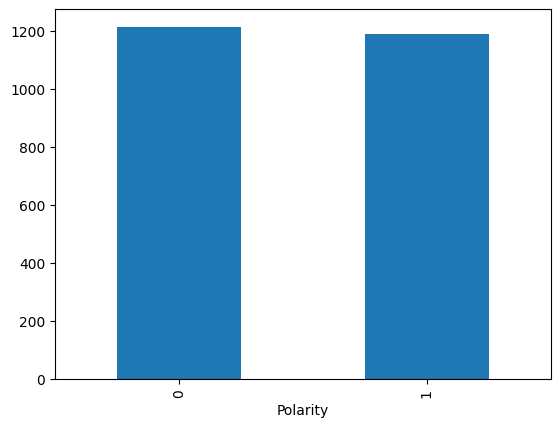

In [5]:
df_train['Polarity'].value_counts().plot.bar()
plt.show()


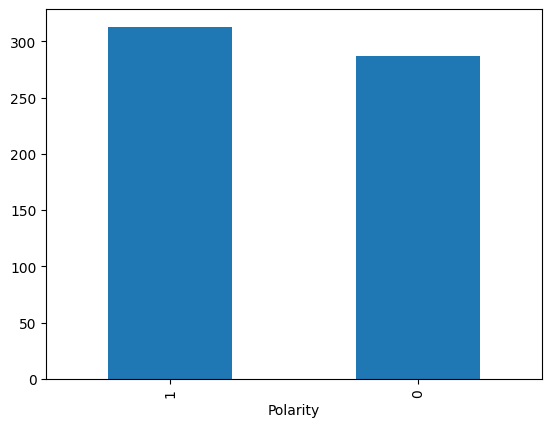

In [6]:
df_test['Polarity'].value_counts().plot.bar()
plt.show()

### Part 1.b. Modeling

Using ML algorithm to train a classification model

In [7]:
# TO DO 

# Define X and y for the training set
X_train = df_train['Sentence']
y_train = df_train['Polarity']


# Define X and y for the test set
X_test = df_test['Sentence']
y_test = df_test['Polarity']


# Ensuring labels are in integer format
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Defining pipelines for different models 
pipelines = {
    'Logistic Regression': Pipeline([
        ('vectorizer', CountVectorizer()), 
        ('classifier', LogisticRegression(penalty="l2", C=1.0, solver='liblinear'))
    ]),
    'Decision Tree': Pipeline([
        ('vectorizer', CountVectorizer()), 
        ('classifier', DecisionTreeClassifier())
    ]),
    'XGBoost': Pipeline([
        ('vectorizer', CountVectorizer()), 
        ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
    ]),
    'CatBoost': Pipeline([
        ('vectorizer', CountVectorizer()), 
        ('classifier', CatBoostClassifier(silent=True))
    ]),
    'Random Forest': Pipeline([
        ('vectorizer', CountVectorizer()), 
        ('classifier', RandomForestClassifier())
    ])
}

# Initialize storage for predictions
train_predictions_store = {}
test_predictions_store = {}

# First loop: Train each model and store predictions
for name, pipeline in pipelines.items():
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict using the model
    train_predictions_store[name] = pipeline.predict(X_train)
    test_predictions_store[name] = pipeline.predict(X_test)

In [8]:
# Predict probabilities on the test set for the second model
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("y_pred shape:", y_pred_prob.shape)

y_pred shape: (600,)


### Part 1.c. Assessing

Use the testing data to measure the accuracy and F1-score of model.  

In [9]:
# Second loop: Evaluate and print metrics
for name in pipelines.keys():
    train_predictions = train_predictions_store[name]
    test_predictions = test_predictions_store[name]
    
    print(f'{name} - Training Set Results:')
    print(classificationSummary(y_train, train_predictions))
    print(classification_report(y_train, train_predictions))
    print('\n')

    print(f'{name} - Test Set Results:')
    print(classificationSummary(y_test, test_predictions))
    print(classification_report(y_test, test_predictions))
    print('\n')

Logistic Regression - Training Set Results:
Confusion Matrix (Accuracy 0.9783)

       Prediction
Actual    0    1
     0 1196   17
     1   35 1152
None
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1213
           1       0.99      0.97      0.98      1187

    accuracy                           0.98      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.98      0.98      0.98      2400



Logistic Regression - Test Set Results:
Confusion Matrix (Accuracy 0.7567)

       Prediction
Actual   0   1
     0 234  53
     1  93 220
None
              precision    recall  f1-score   support

           0       0.72      0.82      0.76       287
           1       0.81      0.70      0.75       313

    accuracy                           0.76       600
   macro avg       0.76      0.76      0.76       600
weighted avg       0.76      0.76      0.76       600



Decision Tree - Training Set Results:
Confus

It appears Logistic Regression has the best success

Now I will compare Ridge, lasso, and elasticnet with different hyperparameter tuning to improve performance

## Logistic Regression with Different Hyperparameter tuning combos

In [15]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore only ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Define pipelines for Logistic Regression with different regularizations
pipelines = {
    'Logistic Regression L1': Pipeline([
        ('vectorizer', CountVectorizer()), 
        ('classifier', LogisticRegression(penalty='l1', solver='liblinear'))
    ]),
    'Logistic Regression L2': Pipeline([
        ('vectorizer', CountVectorizer()), 
        ('classifier', LogisticRegression(penalty='l2', solver='liblinear'))
    ]),
    'Logistic Regression Elastic Net': Pipeline([
        ('vectorizer', CountVectorizer()), 
        ('classifier', LogisticRegression(penalty='elasticnet', solver='saga'))
    ])
}

# Define hyperparameter grid for each type of Logistic Regression
param_grids = {
    'Logistic Regression L1': {
        'classifier__C': [0.01, 0.1, 1, 10, 100]
    },
    'Logistic Regression L2': {
        'classifier__C': [0.01, 0.1, 1, 10, 100]
    },
    'Logistic Regression Elastic Net': {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
    }
}

# Initialize storage for best models, parameters, and results
best_models = {}
best_params = {}
train_predictions = {}
test_predictions = {}
accuracy_scores = {}
f1_scores = {}

# Train, tune, and evaluate each model
for name, pipeline in pipelines.items():
    print(f"Training and tuning: {name}")
    
    # Set up GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=6, n_jobs=-1, verbose=1)
    
    # Train the model
    grid_search.fit(X_train, y_train)
    
    # Store the best model and its parameters
    best_models[name] = grid_search.best_estimator_
    best_params[name] = grid_search.best_params_
    
    # Predict using the best model
    train_predictions[name] = best_models[name].predict(X_train)
    test_predictions[name] = best_models[name].predict(X_test)
    
    # Calculate accuracy and F1-score
    accuracy_scores[name] = {
        'train_accuracy': accuracy_score(y_train, train_predictions[name]),
        'test_accuracy': accuracy_score(y_test, test_predictions[name])
    }
    f1_scores[name] = {
        'train_f1': f1_score(y_train, train_predictions[name], average='weighted'),
        'test_f1': f1_score(y_test, test_predictions[name], average='weighted')
    }

# Print best parameters for each model
for name, params in best_params.items():
    print(f"{name} - Best Parameters:")
    print(params)
    print()

# Print evaluation metrics for each model
for name in pipelines.keys():
    print(f'{name} - Training Set Results:')
    print(classification_report(y_train, train_predictions[name]))
    print()

    print(f'{name} - Test Set Results:')
    print(classification_report(y_test, test_predictions[name]))
    print()

    print(f'{name} - Accuracy and F1-Score:')
    print(f"Training Accuracy: {accuracy_scores[name]['train_accuracy']:.4f}")
    print(f"Test Accuracy: {accuracy_scores[name]['test_accuracy']:.4f}")
    print(f"Training F1-Score: {f1_scores[name]['train_f1']:.4f}")
    print(f"Test F1-Score: {f1_scores[name]['test_f1']:.4f}")
    print()


Training and tuning: Logistic Regression L1
Fitting 6 folds for each of 5 candidates, totalling 30 fits
Training and tuning: Logistic Regression L2
Fitting 6 folds for each of 5 candidates, totalling 30 fits
Training and tuning: Logistic Regression Elastic Net
Fitting 6 folds for each of 25 candidates, totalling 150 fits


/Users/vithushan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vithushan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vithushan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vithushan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vithushan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vithushan/anaconda3/lib/python3.10/sit

/Users/vithushan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vithushan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vithushan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vithushan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vithushan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vithushan/anaconda3/lib/python3.10/sit

/Users/vithushan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vithushan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vithushan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vithushan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vithushan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vithushan/anaconda3/lib/python3.10/sit

Logistic Regression L1 - Best Parameters:
{'classifier__C': 10}

Logistic Regression L2 - Best Parameters:
{'classifier__C': 10}

Logistic Regression Elastic Net - Best Parameters:
{'classifier__C': 10, 'classifier__l1_ratio': 0.1}

Logistic Regression L1 - Training Set Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1213
           1       1.00      1.00      1.00      1187

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00      2400


Logistic Regression L1 - Test Set Results:
              precision    recall  f1-score   support

           0       0.72      0.82      0.76       287
           1       0.81      0.70      0.75       313

    accuracy                           0.76       600
   macro avg       0.76      0.76      0.76       600
weighted avg       0.76      0.76      0.76       600


Logistic Regression L

In [11]:
print('The best model is the logistic regression model with Ridge regularization.')

The best model is the logistic regression model with Ridge regularization.


### Explanation from a business Point of View

The high F1 and accuracy scores on the training data indicate that the model learned from the training dataset very well. However, the drop in performance on the test dataset suggests that the model may not perform as well on unseen data, potentially due to overfitting. Hyperparameter tuning was applied to the best model after comparing it with other models.

From a business standpoint, it is reasonable to assume that some customer feedback could be misinterpreted by the model, possibly due to variations in customers' grammar or the use of sarcasm. Given these considerations, I am satisfied with an overall accuracy of 0.76 on the testing dataset for the ridge model.




### Showing five  instances in which  model’s predictions were incorrect

In [12]:
# Identifying 5 examples of inccorect predictions 

model_name = 'Logistic Regression L2'
model = best_models[model_name]

# Get predictions and true labels for the test set
predictions = model.predict(X_test)
true_labels = y_test

# Find indices where the predictions are incorrect
incorrect_indices = [i for i in range(len(predictions)) if predictions[i] != true_labels.iloc[i]]

# Display up to five incorrect predictions
incorrect_examples = []
for i in incorrect_indices[:5]:  
    example = {
        'Index': i,
        'True Label': true_labels.iloc[i],
        'Predicted Label': predictions[i],
        'Text': X_test.iloc[i] 
    }
    incorrect_examples.append(example)

# Convert to DataFrame for better readability
incorrect_examples_df = pd.DataFrame(incorrect_examples)

print("Examples of Incorrect Predictions:")
print(incorrect_examples_df)

Examples of Incorrect Predictions:
   Index  True Label  Predicted Label  \
0      8           1                0   
1     12           1                0   
2     13           1                0   
3     14           1                0   
4     17           0                1   

                                                Text  
0       It really created a unique feeling though.    
1  Not too screamy not to masculine but just righ...  
2       The camera really likes her in this movie.    
3  I would have casted her in that role after rea...  
4                          Even worse than Ticker!    


[nltk_data] Downloading package punkt to /Users/vithushan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vithushan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vithushan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


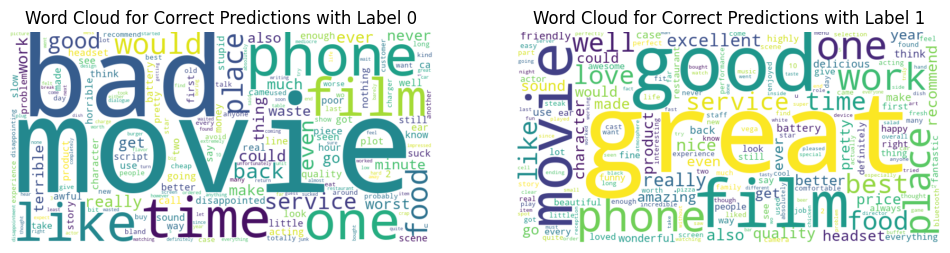

In [13]:
# Visualizing the most common words in each class

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Convert to DataFrame for easy manipulation
df_train = pd.DataFrame({'Text': X_train, 'Label': y_train})
df_test = pd.DataFrame({'Text': X_test, 'Label': y_test})

# Combine train and test data
df_all = pd.concat([df_train, df_test], ignore_index=True)

# Filter text based on the true labels and predictions
text_correct_predictions_0 = df_all[(df_all['Label'] == 0)]['Text']
text_correct_predictions_1 = df_all[(df_all['Label'] == 1)]['Text']

# Function to preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Preprocess the text
tokens_0 = [word for text in text_correct_predictions_0 for word in preprocess_text(text)]
tokens_1 = [word for text in text_correct_predictions_1 for word in preprocess_text(text)]

# Create a frequency distribution for visualization
word_freq_0 = nltk.FreqDist(tokens_0)
word_freq_1 = nltk.FreqDist(tokens_1)

# Create word cloud for correct predictions with Label 0
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
wordcloud_0 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_0)
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Correct Predictions with Label 0')

# Create word cloud for correct predictions with Label 1
plt.subplot(1, 2, 2)
wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_1)
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Correct Predictions with Label 1')

plt.show()


The model's inaccuracies may be attributed to the complexities of the english language. For example, sarcasm in customer reviews can affect the true sentiment, making it challenging for the model to correctly classify them as positive or negative. Additionally, certain words may appear in both positive and negative contexts, potentially leading to misclassifications. These factors highlight the complex nature of language and its impact on model performance.